<a href="https://colab.research.google.com/github/Ommmmi/Data-Analysis-/blob/main/Tcs_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/TCS_stock_history.csv")
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
5,2002-08-19,27.269876,27.269876,26.126661,26.377609,205880,0.0,0.0
6,2002-08-20,26.563503,28.794168,26.386910,27.111877,3773624,0.0,0.0
7,2002-08-21,28.608262,29.147341,27.158333,28.440964,3011064,0.0,0.0
8,2002-08-22,29.379720,30.913303,29.231009,29.667849,6732480,0.0,0.0
9,2002-08-23,29.928077,32.437575,29.565595,31.452364,4841672,0.0,0.0


In [ ]:
df.shape

(4463, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


In [ ]:
import plotly.express as px
numeric_df=df.select_dtypes(include=['float64', 'int64'])

fig=px.imshow(numeric_df.corr(), text_auto=True)
fig.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
df.head(6)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
5,2002-08-19,27.269876,27.269876,26.126661,26.377609,205880,0.0,0.0


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig=make_subplots(rows=2,cols=2,subplot_titles=
                  ["Distribution of Open Prices","Distribution of High Prices","Distribution of Low Prices","Distribution of close Prices"])
colors=["#FA8072", "#2E8B57", "#FF69B4", "#1E90FF"]
columns=["Open","High","Low","Close"]

for i,column in enumerate(columns):
  his=px.histogram(df,x=column,nbins=50)
  his.update_traces(marker_line_color="black",marker_color=colors[i],marker_line_width=1)
  row,col=(i//2)+1,(i%2)+1
  fig.add_trace(his.data[0],row=row,col=col)

fig.update_layout(height=800, width=1000,
    title_text="Price Distributions",
    showlegend=False)
fig.show()

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define columns for x and y axes
a = ["Open", "Date", "Open", "High", "Low", "Close", "Date", "Date", "Date"]
b = ["Volume", "Open", "High", "Low", "Close", "Volume", "High", "Low", "Close"]
colors = ["#FA8072", "#2E8B57", "#FF69B4", "#1E90FF", "#32CD32", "#FA8023", "#008080", "#C71585", "#AFEEEE"]

# Calculate the required number of rows and columns for the subplot grid
num_plots = len(a)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows based on plots and columns

fig = make_subplots(
    rows=num_rows,
    cols=num_cols,
    subplot_titles=[f"{x} vs {y}" for x, y in zip(a, b)]  # Dynamic naming
)

# Loop through the values
for i in range(len(a)):
    row = (i // num_cols) + 1  # Calculate row index
    col = (i % num_cols) + 1  # Calculate column index

    scatter_plot = px.scatter(
        df,
        x=a[i],
        y=b[i],
        color_discrete_sequence=[colors[i]],
        labels={a[i]: f"{a[i]} Price", b[i]: f"{b[i]} Price"},

    )

    # Add scatter plot to the subplot
    fig.add_trace(scatter_plot.data[0], row=row, col=col)

# Update layout
fig.update_layout(
    height=1200,
    width=1000,
    title_text="Scatter Plots for Different Features",
    showlegend=True
)

# Show the figure
fig.show()

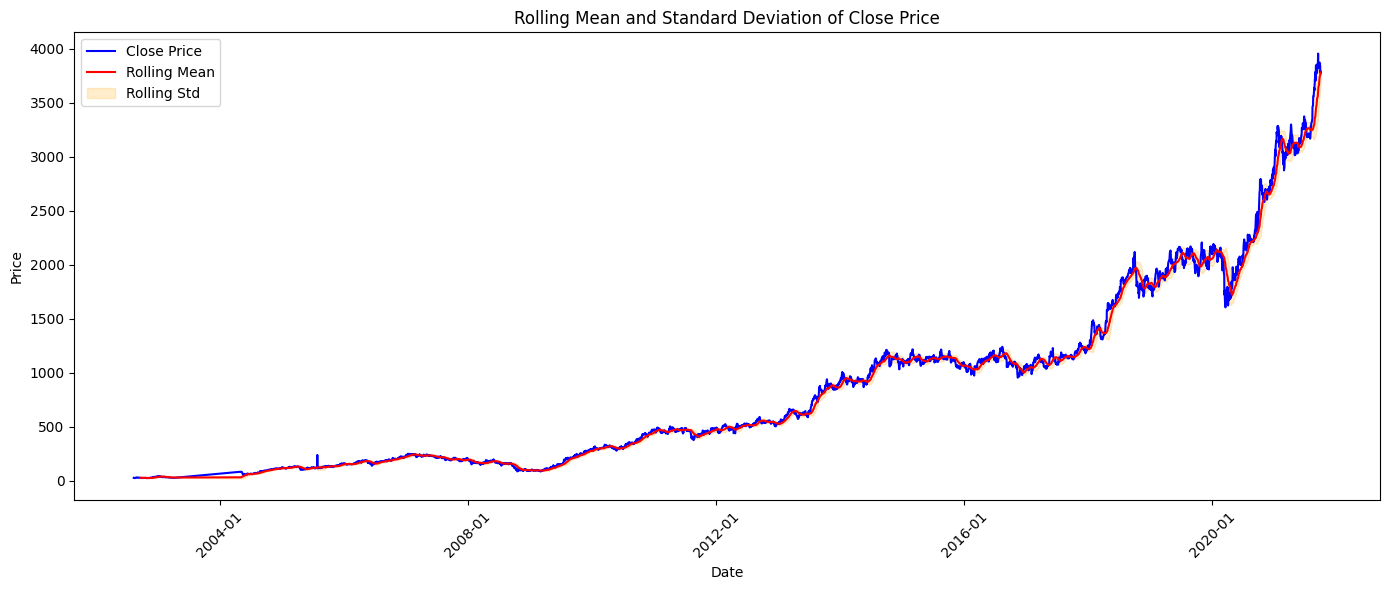

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load data
df = pd.read_csv("/content/TCS_stock_history.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate rolling mean and standard deviation
window_size = 30
df['Rolling_Mean'] = df['Close'].rolling(window=window_size).mean()
df['Rolling_Std'] = df['Close'].rolling(window=window_size).std()

# Visualize rolling statistics
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['Rolling_Mean'], label='Rolling Mean', color='red')
plt.fill_between(df['Date'], df['Rolling_Mean'] - df['Rolling_Std'],
                 df['Rolling_Mean'] + df['Rolling_Std'], color='orange', alpha=0.2, label='Rolling Std')

# Fix x-axis date format
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Rolling Mean and Standard Deviation of Close Price')

# Format x-axis to show fewer, readable dates
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


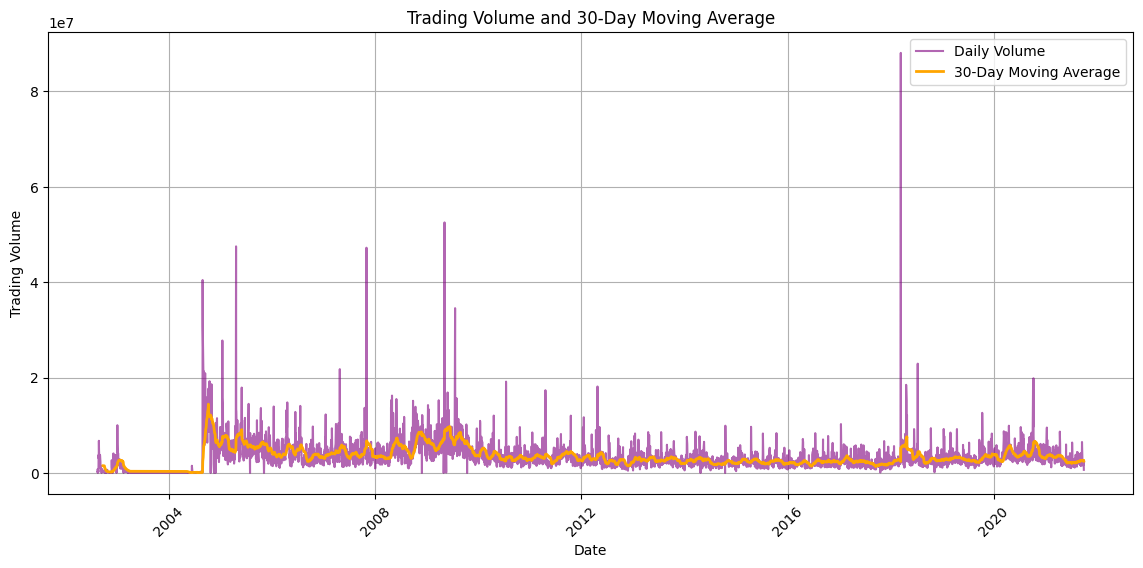

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort values by date
df = df.sort_values('Date')

# Calculate 30-day rolling average of trading volume
df['Volume_MA'] = df['Volume'].rolling(window=30).mean()

# Plot trading volume and moving average
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Volume'], label='Daily Volume', color='purple', alpha=0.6)
plt.plot(df['Date'], df['Volume_MA'], label='30-Day Moving Average', color='orange', linewidth=2)

# Formatting
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Trading Volume and 30-Day Moving Average')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df = pd.read_csv("/content/TCS_stock_history.csv")
# Calculate daily percentage change in closing price
df['Daily_Return'] = df['Close'].pct_change()

# Analyze distribution of daily returns
print("Descriptive Statistics of Daily Returns:")
print(df['Daily_Return'].describe())

# Identify potential outliers using IQR
Q1 = df['Daily_Return'].quantile(0.25)
Q3 = df['Daily_Return'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Daily_Return'] < lower_bound) | (df['Daily_Return'] > upper_bound)]
print("\nPotential Outliers in Daily Returns:")
print(outliers[['Date', 'Daily_Return']])

# Investigate relationship between trading volume and price changes
correlation = df['Volume'].corr(df['Daily_Return'])
print(f"\nCorrelation between Volume and Daily Return: {correlation}")

# Calculate and analyze rolling mean and standard deviation
window_size = 30
df['Rolling_Mean'] = df['Close'].rolling(window=window_size).mean()
df['Rolling_Std'] = df['Close'].rolling(window=window_size).std()



Descriptive Statistics of Daily Returns:
count    4462.000000
mean        0.001613
std         0.040109
min        -0.506111
25%        -0.009086
50%         0.000424
75%         0.010963
max         2.018887
Name: Daily_Return, dtype: float64

Potential Outliers in Daily Returns:
            Date  Daily_Return
2     2002-08-14     -0.068944
7     2002-08-21      0.049022
8     2002-08-22      0.043138
9     2002-08-23      0.060150
14    2002-08-30      0.070799
...          ...           ...
4169  2020-07-28      0.046651
4203  2020-09-14      0.049408
4211  2020-09-24     -0.054793
4217  2020-10-05      0.072262
4346  2021-04-13     -0.043893

[235 rows x 2 columns]

Correlation between Volume and Daily Return: -0.0002708205322585089


In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np

In [ ]:
# Define features (X) and target variable (y)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred=model.predict(X_test)


In [ ]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared Score (R²): {r2:.4f}")


Mean Absolute Error (MAE): 3.62
Mean Squared Error (MSE): 35.37
Root Mean Squared Error (RMSE): 5.95
R-Squared Score (R²): 0.9999


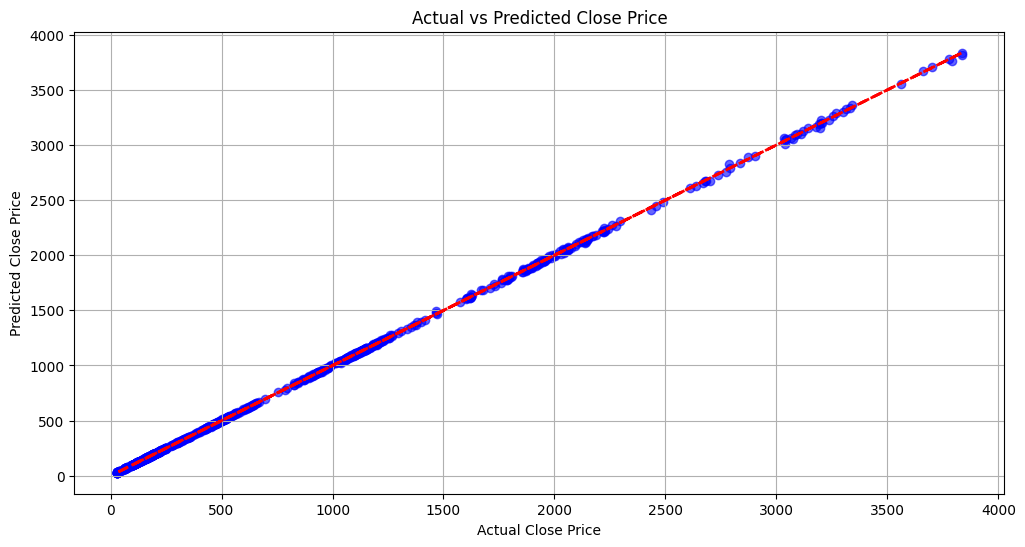

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot(y_test, y_test, color='red', linestyle='dashed', linewidth=2)  # Ideal line
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.grid()
plt.show()


In [ ]:
# Create new features
df['MA_10'] = df['Close'].rolling(window=10).mean()  # 10-day moving average
df['MA_50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average
df['Price_Change'] = df['Close'].pct_change()  # Daily price change %
df['Volatility'] = df['Close'].rolling(window=10).std()  # 10-day rolling standard deviation

# Drop NaN values created by rolling calculations
df = df.dropna()

# Select features including new ones
X = df[['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_50', 'Price_Change', 'Volatility']]
y = df['Close']


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)


In [ ]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)


In [ ]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-Squared Score (R²): {r2:.4f}")

# Evaluate both models
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")



Random Forest Performance:
Mean Absolute Error (MAE): 5.01
Mean Squared Error (MSE): 81.63
Root Mean Squared Error (RMSE): 9.03
R-Squared Score (R²): 0.9999

XGBoost Performance:
Mean Absolute Error (MAE): 7.89
Mean Squared Error (MSE): 337.69
Root Mean Squared Error (RMSE): 18.38
R-Squared Score (R²): 0.9995


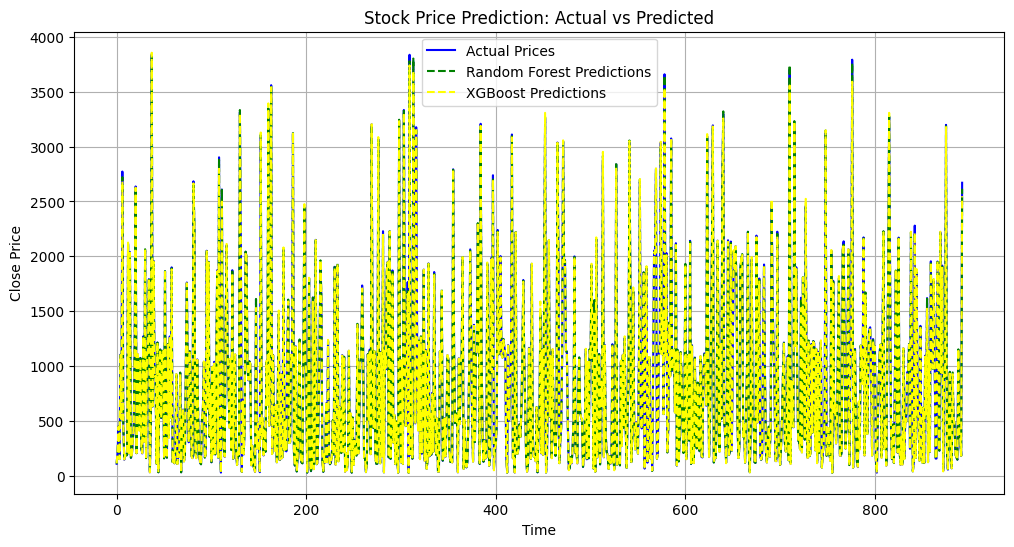

In [ ]:
plt.figure(figsize=(12, 6))

# Plot actual vs predicted prices
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred_rf, label="Random Forest Predictions", color="green", linestyle='dashed')
plt.plot(y_pred_xgb, label="XGBoost Predictions", color="yellow", linestyle='dashed')

plt.xlabel("Time")
plt.ylabel("Close Price")
plt.title("Stock Price Prediction: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [ ]:
# Select Close price for prediction
data = df[['Close']].values

# Normalize data (LSTMs perform better with scaled values)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Define function to create sequences
def create_sequences(data, time_steps=50):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

# Define time steps (lookback window)
time_steps = 50
X, y = create_sequences(data_scaled, time_steps)

# Split into training and test sets (80% train, 20% test)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - loss: 0.0058 - val_loss: 5.7839e-04
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 4.1605e-05 - val_loss: 8.5751e-04
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 3.9842e-05 - val_loss: 0.0017
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 3.8753e-05 - val_loss: 0.0016
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 4.4929e-05 - val_loss: 8.4941e-04
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 5.9200e-05 - val_loss: 0.0023
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - loss: 3.9999e-05 - val_loss: 0.0016
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 3.7280e-05 - val_loss: 0.0015
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 3.6424e-05 - val_loss: 0.0015
Epoch 10/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 3.8823e-05 - val_loss: 6.2051e-04
Epoch 11/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 5.6878e-05 -

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform predictions to get actual prices
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r_square=r2_score(y_test_actual, y_pred_actual)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r_square=r2_score(y_test_actual, y_pred_actual)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared Score (R²): {r_square:.4f}")


Mean Absolute Error (MAE): 39.30
Mean Absolute Error (MAE): 39.30
Mean Squared Error (MSE): 2906.16
Root Mean Squared Error (RMSE): 53.91
R-Squared Score (R²): 0.9916
